In [74]:
import matplotlib.pyplot as plt

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, roc_auc_score, roc_curve

import seaborn as sns
sns.set(style="whitegrid")
import glob
import os

# Question 1 : Reading the Heart Dataset

In [79]:
#1.Import health care dataset after downloading dataset from Kaggle
#read the dataset

df = pd.read_csv("/Users/44972/Desktop/BITSPilani/ML Assignment\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Question 2 : Extract X as all columns except the last column and Y as the last column.


In [80]:
from sklearn.preprocessing import StandardScaler

y = df.target
x = df.drop(columns = ['target'])

# Question 3 : Visualize the dataset using any two appropriate graphs

## 3a.Histographic representation of Dataset

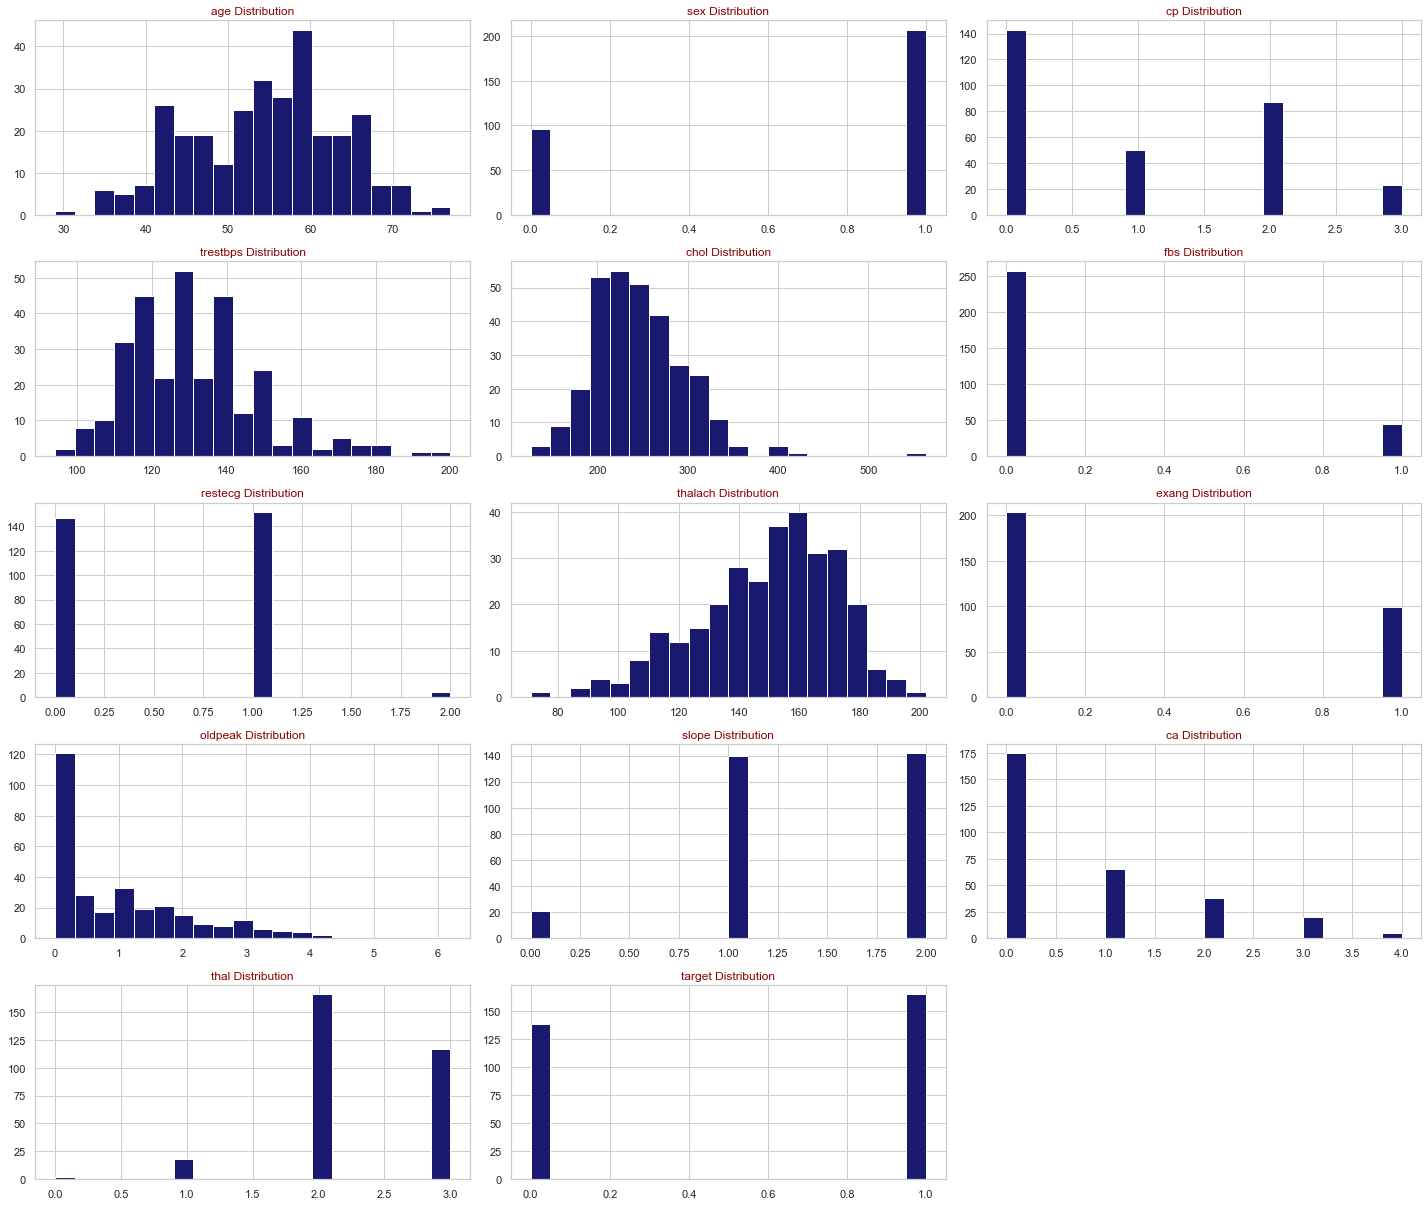

In [72]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,6,3)

## 3b.Pairplot representation of Dataset

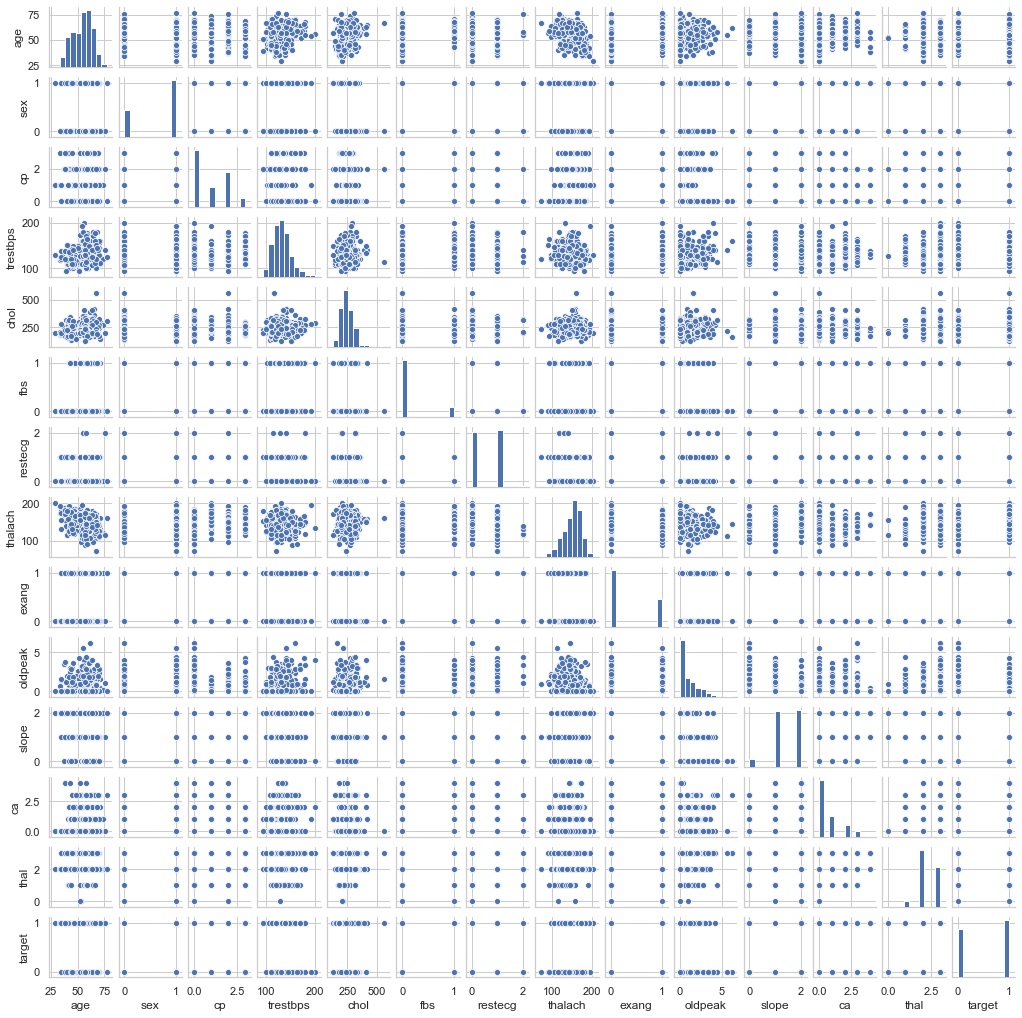

In [73]:

sn.pairplot(data=df,height=1)

# Question 4 : Visualize the correlation between all the variables of a dataset.

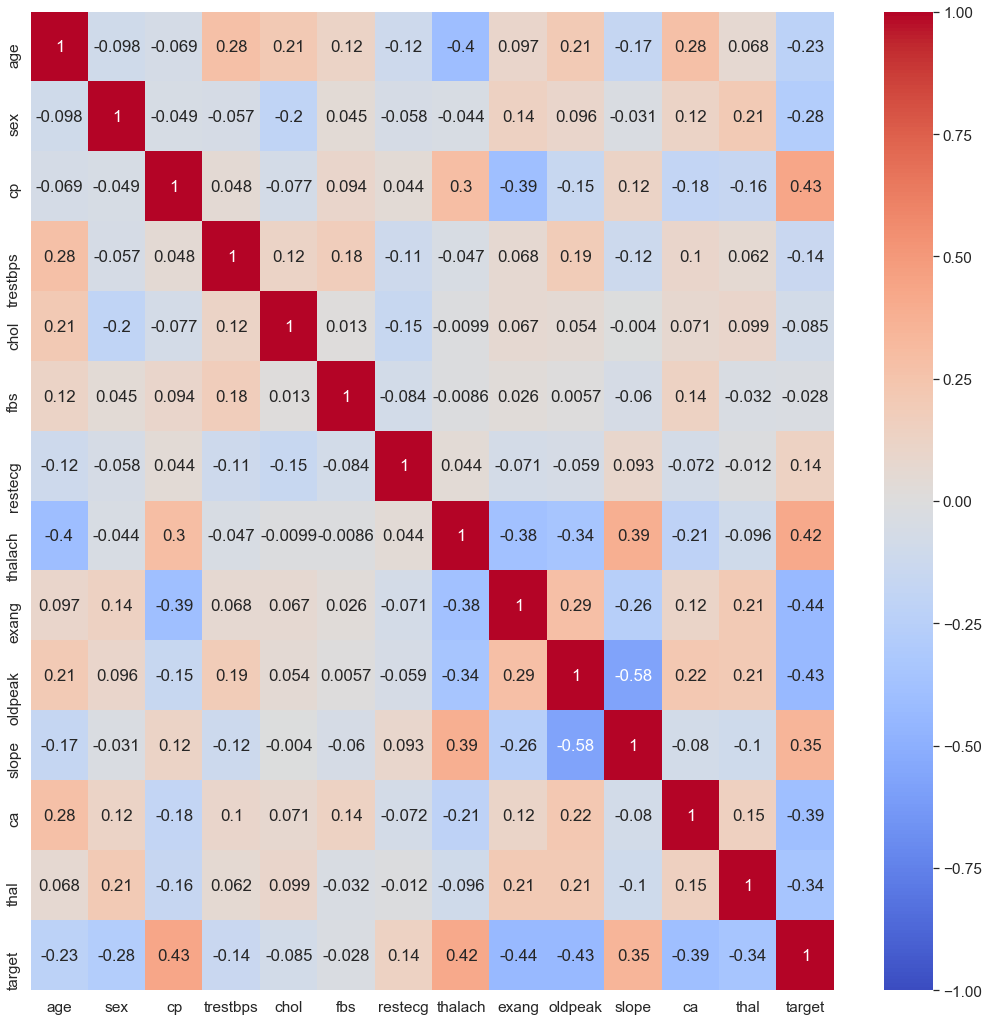

In [34]:
#4.Visualizing  the correlation between all the variables of a dataset using HeatMap.

import matplotlib.pyplot as plt
import seaborn as sn

#correlation graph for the dataset
corr = df.corr()

plt.figure(figsize = (18,18))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', vmin = -1, vmax=1)

# Question 5 : Split the data into a training set and testing set.

In [81]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Question 6 : Perform 10-fold cross-validation 

In [37]:
#Implementing cross validation

k = 10
kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression(solver= 'liblinear')

acc_score = []

for train_index , test_index in kf.split(x):
    xtrain , xtest = x.iloc[train_index,:],x.iloc[test_index,:]
    ytrain , ytest = y[train_index] , y[test_index]
    
    model.fit(xtrain,ytrain)
    pred_values = model.predict(xtest)
    
    acc = accuracy_score(pred_values , ytest)
    acc_score.append(acc)
    
avg_acc_score = sum(acc_score)/k

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.9032258064516129, 0.8064516129032258, 0.9354838709677419, 0.8, 0.8666666666666667, 0.7333333333333333, 0.7, 0.8333333333333334, 0.8, 0.5666666666666667]
Avg accuracy : 0.7945161290322581


# Question 7 : Train a Logistic regression model for the dataset.

In [63]:
#7.Training a Logistic regression model for the dataset.
from sklearn.linear_model import LogisticRegression

def models(xtrain, xtest, ytrain, ytest):
    
    #logistic regression
    lrmodel = LogisticRegression(random_state = 0)
    lrmodel.fit(xtrain, ytrain)
    lrypred = lrmodel.predict(xtest)
    
    return lrypred

In [64]:
lr = models (xtrain, xtest, ytrain, ytest)
lr

C:\Users\44972\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

# Qusetion 8 : Compute the accuracy and confusion matrix

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [31]:
#8.Computing the accuracy and confusion matrix.


ac = accuracy_score(ytest, lr)

lrcm = confusion_matrix(ytest, lr)

results = pd.DataFrame([['Logistic regression', ac,lrcm ]], columns = ['Model', 'Accuracy', 'Confusion Matrix'])

In [32]:
print(results)

                 Model  Accuracy    Confusion Matrix
0  Logistic regression  0.885246  [[25, 4], [3, 29]]


## 8a.Visualizing Confusion Matrix

Text(0.5, 1, "['Logistic regression']")

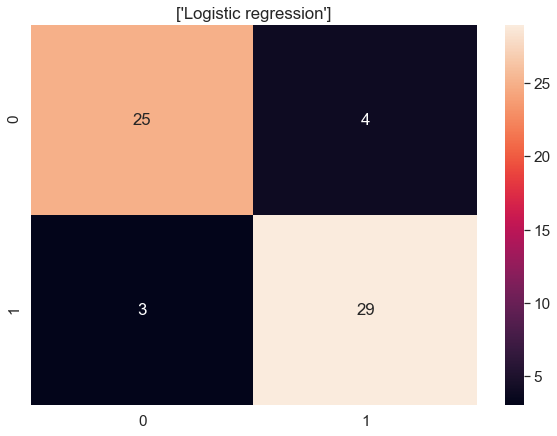

In [33]:
#8a.Visualizing Confusion Matrix
import numpy as np

lrcm = confusion_matrix(ytest, lr)

models_list = [lrcm]
model_names = ['Logistic regression']

df_cm = pd.DataFrame(cl, index = (0,1), columns = (0,1))
plt.figure(figsize = (10,7))
sn.set(font_scale = 1.4)
sn.heatmap(df_cm, annot = True, fmt = 'g')
plt.title(model_names)

 

In [82]:
# Question : Plot the decision boundary, visualize training and test results

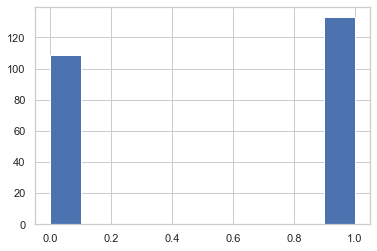

In [83]:
ytrain.hist()

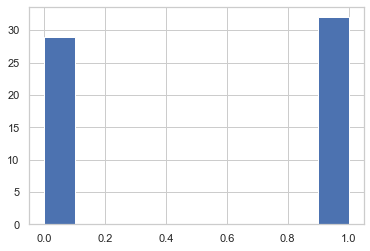

In [84]:
ytest.hist()